In [7]:
#Ceren Camkiran

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence

import matplotlib.pyplot as plt

In [2]:
file_path = "household_power_consumption.txt"

column_names = [
    "Date", "Time", "Global_active_power", "Global_reactive_power",
    "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2",
    "Sub_metering_3"
]

data = pd.read_csv(file_path, sep=";", header=0, names=column_names, na_values="?", parse_dates=[["Date", "Time"]])
data.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
# Create a DatetimeIndex using the parsed "Date_Time" column
data["Date_Time"] = pd.to_datetime(data["Date_Time"])
data.set_index("Date_Time", inplace=True)

# Resample data to hourly measurements
hourly_data = data.resample("H").mean()
print(hourly_data.head())

                     Global_active_power  Global_reactive_power     Voltage  \

Date_Time                                                                     

2006-12-16 17:00:00             4.222889               0.229000  234.643889   

2006-12-16 18:00:00             3.632200               0.080033  234.580167   

2006-12-16 19:00:00             3.400233               0.085233  233.232500   

2006-12-16 20:00:00             3.268567               0.075100  234.071500   

2006-12-16 21:00:00             3.056467               0.076667  237.158667   



                     Global_intensity  Sub_metering_1  Sub_metering_2  \

Date_Time                                                               

2006-12-16 17:00:00         18.100000             0.0        0.527778   

2006-12-16 18:00:00         15.600000             0.0        6.716667   

2006-12-16 19:00:00         14.503333             0.0        1.433333   

2006-12-16 20:00:00         13.916667             0.0        0.00000

In [4]:
hourly_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.00,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.00,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.00,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.00,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.00,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-12-11 19:00:00,2.391967,0.113800,232.183833,10.336667,0.35,0.000000,13.133333
2010-12-11 20:00:00,1.753333,0.084833,234.007500,7.500000,8.05,1.100000,10.066667
2010-12-11 21:00:00,1.114900,0.085800,236.543667,4.746667,8.55,0.450000,0.000000


In [5]:
# Forward fill missing values
hourly_data.fillna(method='ffill', inplace=True)

In [6]:
y_train = hourly_data["Global_active_power"].loc[:"2010-05-31"].to_numpy()
y_test = hourly_data["Global_active_power"].loc["2010-06-01":].to_numpy()
y_train = y_train[:,None]
y_test = y_test[:,None]
print(y_train.shape)
print(y_test.shape)

(30295, 1)

(4656, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler_y = MinMaxScaler(feature_range = (0.05, 0.95))
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)
print(np.min(y_train), np.max(y_train))
print(np.min(y_test), np.max(y_test))

0.05 0.9499999999999998

0.05994168703649998 0.8194436963997181


In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator
window_size = 24
generator_train = TimeseriesGenerator(y_train,
                                      y_train,
                                      length = window_size,
                                      batch_size = 32)
generator_test = TimeseriesGenerator(y_test,
                                     y_test,
                                     length = window_size,
                                     batch_size = 32) 

In [15]:
rnn_model = keras.models.Sequential([
    keras.layers.LSTM(units = 128,
                      input_shape = (window_size, 1)),
    keras.layers.Dense(units = 64, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 16, activation = "relu"),
    keras.layers.Dense(units = 1)
])

rnn_model.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 lstm_1 (LSTM)               (None, 128)               66560     

                                                                 

 dense_3 (Dense)             (None, 64)                8256      

                                                                 

 dropout_1 (Dropout)         (None, 64)                0         

                                                                 

 dense_4 (Dense)             (None, 16)                1040      

                                                                 

 dense_5 (Dense)             (None, 1)                 17        

                                                                 


Total params: 75,873

Trainable params: 75,873

Non-trainable params: 0

_________________________________________________________________


In [16]:
rnn_model.compile(optimizer = "adam",
                  loss = "mean_squared_error")

In [17]:
rnn_history = rnn_model.fit(generator_train,
                            steps_per_epoch = len(generator_train),
                            epochs = 10)

Epoch 1/10

946/946 [==============================] - 12s 11ms/step - loss: 0.0093

Epoch 2/10

946/946 [==============================] - 11s 11ms/step - loss: 0.0078

Epoch 3/10

946/946 [==============================] - 11s 12ms/step - loss: 0.0075

Epoch 4/10

946/946 [==============================] - 12s 13ms/step - loss: 0.0074

Epoch 5/10

946/946 [==============================] - 12s 12ms/step - loss: 0.0074

Epoch 6/10

946/946 [==============================] - 12s 12ms/step - loss: 0.0073

Epoch 7/10

946/946 [==============================] - 12s 13ms/step - loss: 0.0073

Epoch 8/10

946/946 [==============================] - 12s 13ms/step - loss: 0.0072

Epoch 9/10

946/946 [==============================] - 12s 13ms/step - loss: 0.0072

Epoch 10/10

946/946 [==============================] - 12s 13ms/step - loss: 0.0072


In [18]:
rnn_model.evaluate(generator_train)
rnn_model.evaluate(generator_test)

946/946 [==============================] - 6s 6ms/step - loss: 0.0070

145/145 [==============================] - 1s 5ms/step - loss: 0.0048


0.004847907926887274

In [19]:
y_train_hat = rnn_model.predict(generator_train)
y_test_hat = rnn_model.predict(generator_test)

946/946 [==============================] - 5s 5ms/step

145/145 [==============================] - 1s 5ms/step


In [20]:
y_train_original = scaler_y.inverse_transform(y_train)[:,0]
y_test_original = scaler_y.inverse_transform(y_test)[:,0]
print(y_train_original)

[4.22288889 3.6322     3.40023333 ... 1.25173333 1.4027     0.50113333]


In [21]:
y_train_hat_scaled = scaler_y.inverse_transform(y_train_hat)[:,0]
y_test_hat_scaled = scaler_y.inverse_transform(y_test_hat)[:,0]
print(y_train_hat_scaled)

[2.6581898  2.7188768  2.8814251  ... 0.5667099  0.9649893  0.82825905]


In [22]:
print(y_test_original.shape)
print(y_test_hat_scaled.shape)

(4656,)

(4632,)


In [23]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_train_original[window_size:], y_train_hat_scaled)))
print(np.sqrt(mean_squared_error(y_test_original[window_size:], y_test_hat_scaled)))

0.5964984008785439

0.49795103866201684


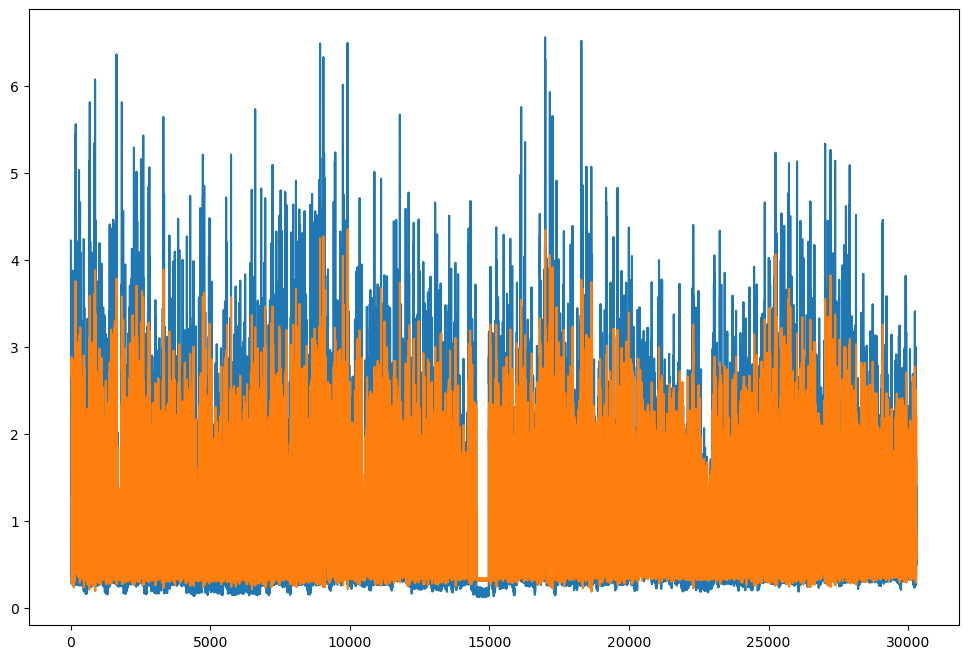

In [24]:
plt.figure(figsize = (12, 8))
plt.plot(range(len(y_train_original)), y_train_original)
plt.plot(np.arange(window_size, len(y_train_original)), y_train_hat_scaled)
plt.show()

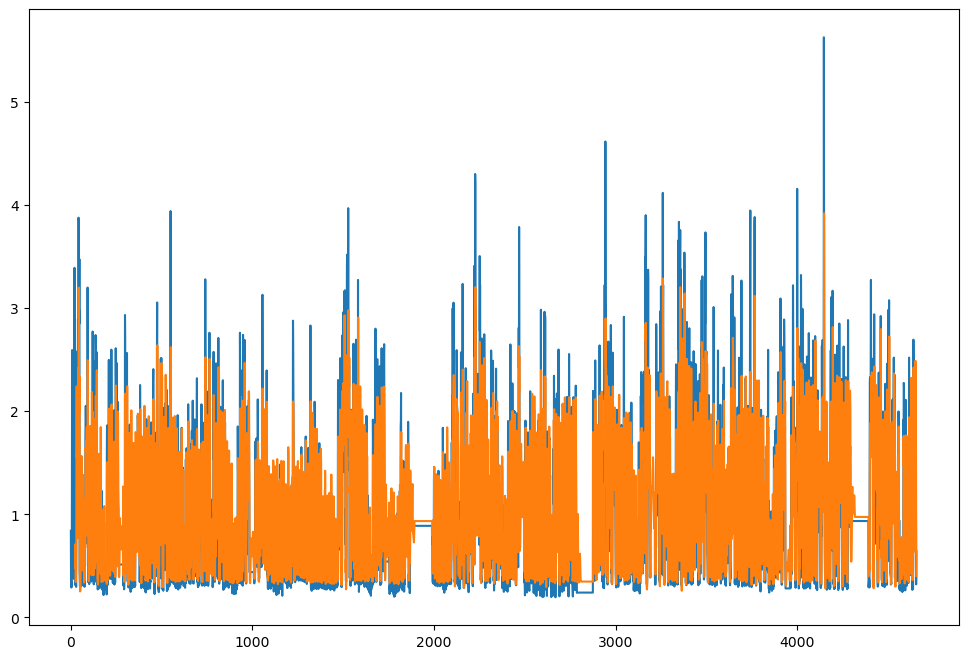

In [25]:
plt.figure(figsize = (12, 8))
plt.plot(range(len(y_test_original)), y_test_original)
plt.plot(np.arange(window_size, len(y_test_original)), y_test_hat_scaled)
plt.show()

In [26]:
print(np.corrcoef(y_train_hat.T, y_train[window_size:].T))
print(np.corrcoef(y_train_hat_scaled.T, y_train_original[window_size:].T))

[[1.         0.75699035]

 [0.75699035 1.        ]]

[[1.         0.75699035]

 [0.75699035 1.        ]]


In [27]:
print(np.sqrt(mean_squared_error(y_train_original[window_size:], y_train_hat_scaled)))
print(np.sqrt(mean_squared_error(y_test_original[window_size:], y_test_hat_scaled)))

print(np.sqrt(mean_squared_error(y_train[window_size:], y_train_hat)))
print(np.sqrt(mean_squared_error(y_test[window_size:], y_test_hat)))

0.5964984008785439

0.49795103866201684

0.08340647558815784

0.06962691063356932


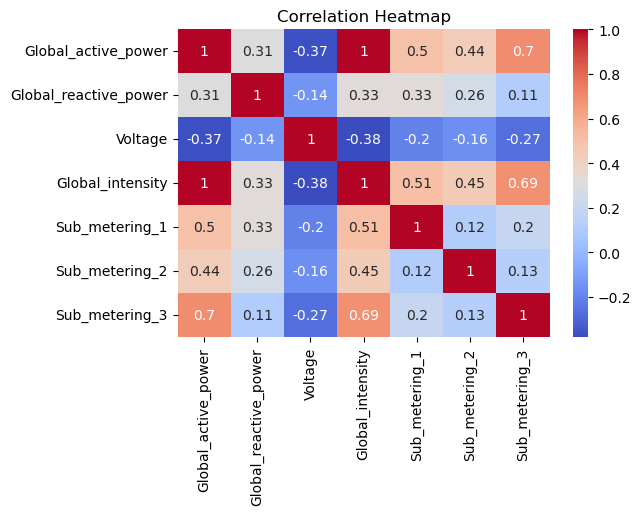

In [31]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = hourly_data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [38]:
X_train = hourly_data[["Global_active_power", "Global_intensity", "Sub_metering_2"]].loc[:"2010-05-31"].fillna(method = "ffill").to_numpy()
X_test = hourly_data[["Global_active_power",  "Global_intensity", "Sub_metering_2"]].loc["2010-06-01":].fillna(method = "ffill").to_numpy()

y_train = hourly_data["Global_active_power"].loc[:"2010-05-31"].to_numpy()
y_test = hourly_data["Global_active_power"].loc["2010-06-01":].to_numpy()

y_train = y_train[:,None]
y_test = y_test[:,None]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(30295, 3) (4656, 3)

(30295, 1) (4656, 1)


In [39]:
scaler_y = MinMaxScaler(feature_range = (0.05, 0.95))
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

scaler_X = MinMaxScaler(feature_range = (0.05, 0.95))
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [40]:
window_size = 24
generator_train = TimeseriesGenerator(X_train,
                                      y_train,
                                      length = window_size,
                                      batch_size = 32)
generator_test = TimeseriesGenerator(X_test,
                                     y_test,
                                     length = window_size,
                                     batch_size = 32)

In [41]:
rnn_model = keras.models.Sequential([
    keras.layers.LSTM(units = 256, input_shape = (window_size, X_train.shape[1])),
    keras.layers.Dense(units = 128, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 16, activation = "relu"),
    keras.layers.Dense(units = 1)
])

rnn_model.summary()

Model: "sequential_3"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 lstm_3 (LSTM)               (None, 256)               266240    

                                                                 

 dense_9 (Dense)             (None, 128)               32896     

                                                                 

 dropout_3 (Dropout)         (None, 128)               0         

                                                                 

 dense_10 (Dense)            (None, 16)                2064      

                                                                 

 dense_11 (Dense)            (None, 1)                 17        

                                                                 


Total params: 301,217

Trainable params: 301,217

Non-trainable params: 0

_________________________________________________________________


In [42]:
rnn_model.compile(optimizer = "adam",
                  loss = "mean_squared_error")

In [43]:
rnn_history = rnn_model.fit(generator_train,
                            steps_per_epoch = len(generator_train),
                            epochs = 10)

Epoch 1/10

946/946 [==============================] - 38s 38ms/step - loss: 0.0084

Epoch 2/10

946/946 [==============================] - 38s 40ms/step - loss: 0.0075

Epoch 3/10

946/946 [==============================] - 38s 41ms/step - loss: 0.0074

Epoch 4/10

946/946 [==============================] - 38s 41ms/step - loss: 0.0072

Epoch 5/10

946/946 [==============================] - 39s 41ms/step - loss: 0.0072

Epoch 6/10

946/946 [==============================] - 39s 41ms/step - loss: 0.0071

Epoch 7/10

946/946 [==============================] - 39s 41ms/step - loss: 0.0071

Epoch 8/10

946/946 [==============================] - 39s 41ms/step - loss: 0.0070

Epoch 9/10

946/946 [==============================] - 39s 41ms/step - loss: 0.0070

Epoch 10/10

946/946 [==============================] - 39s 41ms/step - loss: 0.0069


In [44]:
y_train_hat = rnn_model.predict(generator_train)
y_test_hat = rnn_model.predict(generator_test)

y_train_original = scaler_y.inverse_transform(y_train)[:,0]
y_test_original = scaler_y.inverse_transform(y_test)[:,0]
print(y_train_original)

y_train_hat_scaled = scaler_y.inverse_transform(y_train_hat)[:,0]
y_test_hat_scaled = scaler_y.inverse_transform(y_test_hat)[:,0]
print(y_train_hat_scaled)

print(np.sqrt(mean_squared_error(y_train_original[window_size:], y_train_hat_scaled)))
print(np.sqrt(mean_squared_error(y_test_original[window_size:], y_test_hat_scaled)))

946/946 [==============================] - 14s 15ms/step

145/145 [==============================] - 2s 15ms/step

[4.22288889 3.6322     3.40023333 ... 1.25173333 1.4027     0.50113333]

[2.8780913  2.9432817  3.0917954  ... 0.6570551  0.8848544  0.74475884]

0.5928122261740252

0.492751215218637


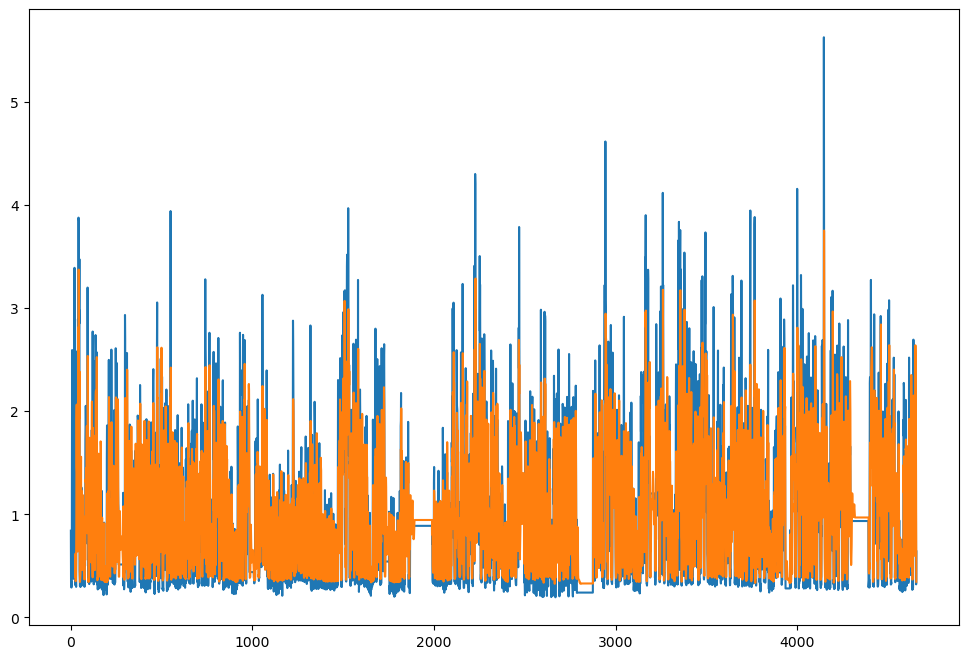

In [45]:
plt.figure(figsize = (12, 8))
plt.plot(range(len(y_test_original)), y_test_original)
plt.plot(np.arange(window_size, len(y_test_original)), y_test_hat_scaled)
plt.show()

In [65]:
X_train = hourly_data[["Global_active_power", "Global_intensity", "Sub_metering_2"]].loc[:"2010-05-31"].fillna(method = "ffill").to_numpy()
X_test = hourly_data[["Global_active_power",  "Global_intensity", "Sub_metering_2"]].loc["2010-06-01":].fillna(method = "ffill").to_numpy()

y_train = hourly_data["Global_active_power"].loc[:"2010-05-31"].to_numpy()
y_test = hourly_data["Global_active_power"].loc["2010-06-01":].to_numpy()

y_train = y_train[:,None]
y_test = y_test[:,None]

scaler_y = MinMaxScaler(feature_range = (0.05, 0.95))
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

scaler_X = MinMaxScaler(feature_range = (0.05, 0.95))
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [66]:
days = hourly_data[:"2010-05-31"].index.day.to_numpy()
days = days[:,None] / 31
months = hourly_data[:"2010-05-31"].index.month.to_numpy()
months = months[:,None] / 12
hours = hourly_data[:"2010-05-31"].index.hour.to_numpy()
hours = hours[:, None] / 24
X_train = np.hstack((X_train, days, months, hours))

days = hourly_data["2010-06-01":].index.day.to_numpy()
days = days[:,None] / 31
months = hourly_data["2010-06-01":].index.month.to_numpy()
months = months[:,None] / 12
hours = hourly_data["2010-06-01":].index.hour.to_numpy()
hours = hours[:, None] / 24
X_test = np.hstack((X_test, days, months, hours))


print(X_train.shape)
print(X_test.shape)

(30295, 6)

(4656, 6)


In [67]:
window_size = 24
generator_train = TimeseriesGenerator(X_train,
                                      y_train,
                                      length = window_size,
                                      batch_size = 32)
generator_test = TimeseriesGenerator(X_test,
                                     y_test,
                                     length = window_size,
                                     batch_size = 32)

In [68]:
rnn_model = keras.models.Sequential([
    keras.layers.LSTM(units = 256, 
                      input_shape = (window_size, X_train.shape[1])),
    keras.layers.Dense(units = 128, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 16, activation = "relu"),
    keras.layers.Dense(units = 1)
])

rnn_model.summary()

Model: "sequential_6"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 lstm_5 (LSTM)               (None, 256)               269312    

                                                                 

 dense_18 (Dense)            (None, 128)               32896     

                                                                 

 dropout_6 (Dropout)         (None, 128)               0         

                                                                 

 dense_19 (Dense)            (None, 16)                2064      

                                                                 

 dense_20 (Dense)            (None, 1)                 17        

                                                                 


Total params: 304,289

Trainable params: 304,289

Non-trainable params: 0

_________________________________________________________________


In [69]:
rnn_model.compile(optimizer = "adam",
                  loss = "mean_squared_error")

In [70]:
rnn_history = rnn_model.fit(generator_train,
                            steps_per_epoch = len(generator_train),
                            epochs = 10)

Epoch 1/10

946/946 [==============================] - 46s 47ms/step - loss: 0.0093

Epoch 2/10

946/946 [==============================] - 49s 52ms/step - loss: 0.0073

Epoch 3/10

946/946 [==============================] - 49s 52ms/step - loss: 0.0070

Epoch 4/10

946/946 [==============================] - 49s 51ms/step - loss: 0.0069

Epoch 5/10

946/946 [==============================] - 49s 52ms/step - loss: 0.0068

Epoch 6/10

946/946 [==============================] - 49s 52ms/step - loss: 0.0067

Epoch 7/10

946/946 [==============================] - 49s 52ms/step - loss: 0.0066

Epoch 8/10

946/946 [==============================] - 48s 51ms/step - loss: 0.0066

Epoch 9/10

946/946 [==============================] - 49s 51ms/step - loss: 0.0065

Epoch 10/10

946/946 [==============================] - 48s 51ms/step - loss: 0.0064


In [53]:
y_train_hat = rnn_model.predict(generator_train)
y_test_hat = rnn_model.predict(generator_test)

y_train_original = scaler_y.inverse_transform(y_train)[:,0]
y_test_original = scaler_y.inverse_transform(y_test)[:,0]
print(y_train_original)

y_train_hat_scaled = scaler_y.inverse_transform(y_train_hat)[:,0]
y_test_hat_scaled = scaler_y.inverse_transform(y_test_hat)[:,0]
print(y_train_hat_scaled)

print(np.sqrt(mean_squared_error(y_train_original[window_size:], y_train_hat_scaled)))
print(np.sqrt(mean_squared_error(y_test_original[window_size:], y_test_hat_scaled)))

946/946 [==============================] - 14s 15ms/step

145/145 [==============================] - 2s 16ms/step

[4.22288889 3.6322     3.40023333 ... 1.25173333 1.4027     0.50113333]

[2.9512286  3.0985668  3.279277   ... 0.8919999  1.1852956  0.76422894]

0.5778776245264453

0.4796033224221679


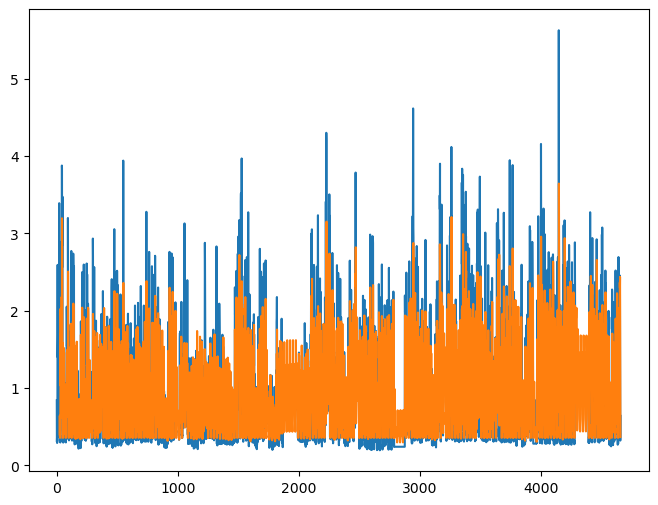

In [54]:
plt.figure(figsize = (8, 6))
plt.plot(range(len(y_test_original)), y_test_original)
plt.plot(np.arange(window_size, len(y_test_original)), y_test_hat_scaled)
plt.show()

In [56]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

window_size = 24

# Create TimeseriesGenerator for training data
generator_train = TimeseriesGenerator(X_train, y_train,
                                      length=window_size, batch_size=32)

# Create TimeseriesGenerator for test data
generator_test = TimeseriesGenerator(X_test, y_test,
                                     length=window_size, batch_size=32)

# Build a GRU model
gru_model = Sequential([
    GRU(units=256, input_shape=(window_size, X_train.shape[1])),
    Dense(units=128, activation="relu"),
    Dropout(0.2),
    Dense(units=16, activation="relu"),
    Dense(units=1)
])

# Display model summary
gru_model.summary()

Model: "sequential_5"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 gru (GRU)                   (None, 256)               202752    

                                                                 

 dense_15 (Dense)            (None, 128)               32896     

                                                                 

 dropout_5 (Dropout)         (None, 128)               0         

                                                                 

 dense_16 (Dense)            (None, 16)                2064      

                                                                 

 dense_17 (Dense)            (None, 1)                 17        

                                                                 


Total params: 237,729

Trainable params: 237,729

Non-trainable params: 0

_________________________________________________________________


In [58]:
gru_model.compile(optimizer = "adam", loss="mean_squared_error")

In [59]:
rnn_history = gru_model.fit(generator_train,
                             steps_per_epoch=len(generator_train),
                             epochs=10)

Epoch 1/10

946/946 [==============================] - 22s 22ms/step - loss: 0.0088

Epoch 2/10

946/946 [==============================] - 22s 23ms/step - loss: 0.0075

Epoch 3/10

946/946 [==============================] - 23s 24ms/step - loss: 0.0072

Epoch 4/10

946/946 [==============================] - 23s 24ms/step - loss: 0.0070

Epoch 5/10

946/946 [==============================] - 23s 25ms/step - loss: 0.0069

Epoch 6/10

946/946 [==============================] - 23s 25ms/step - loss: 0.0068

Epoch 7/10

946/946 [==============================] - 24s 26ms/step - loss: 0.0067

Epoch 8/10

946/946 [==============================] - 23s 25ms/step - loss: 0.0066

Epoch 9/10

946/946 [==============================] - 24s 25ms/step - loss: 0.0065

Epoch 10/10

946/946 [==============================] - 24s 25ms/step - loss: 0.0065


In [62]:
y_train_hat = gru_model.predict(generator_train)
y_test_hat = gru_model.predict(generator_test)

y_train_original = scaler_y.inverse_transform(y_train)[:, 0]
y_test_original = scaler_y.inverse_transform(y_test)[:, 0]
print(y_train_original)

y_train_hat_scaled = scaler_y.inverse_transform(y_train_hat)[:, 0]
y_test_hat_scaled = scaler_y.inverse_transform(y_test_hat)[:, 0]
print(y_train_hat_scaled)

print(np.sqrt(mean_squared_error(y_train_original[window_size:], y_train_hat_scaled)))
print(np.sqrt(mean_squared_error(y_test_original[window_size:], y_test_hat_scaled)))

946/946 [==============================] - 8s 8ms/step

145/145 [==============================] - 1s 9ms/step

[4.22288889 3.6322     3.40023333 ... 1.25173333 1.4027     0.50113333]

[3.0845776 3.165218  3.2927268 ... 0.8948394 1.4292572 1.0214864]

0.564364697262587

0.47431031833255527


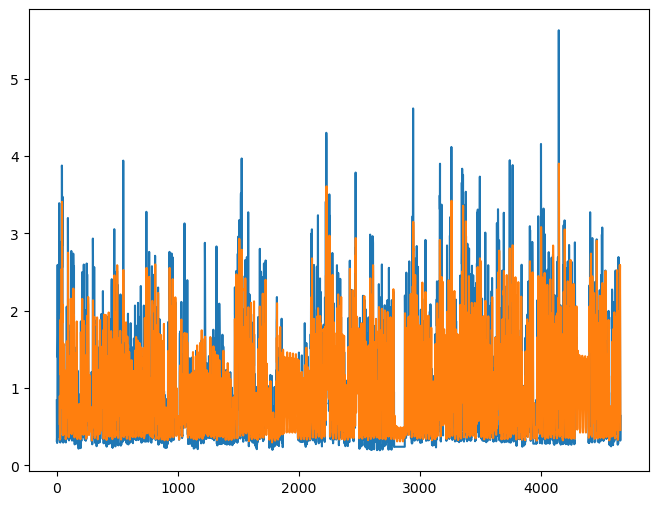

In [63]:
plt.figure(figsize = (8, 6))
plt.plot(range(len(y_test_original)), y_test_original)
plt.plot(np.arange(window_size, len(y_test_original)), y_test_hat_scaled)
plt.show()